<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Data Normalization Techniques**


Estimated time needed: **30** minutes


In this lab, you will focus on data normalization. This includes identifying compensation-related columns, applying normalization techniques, and visualizing the data distributions.


このラボでは、データの正規化に焦点を当てます。これには、報酬関連の列の識別、正規化手法の適用、データ分布の視覚化が含まれます。

## Objectives


In this lab, you will perform the following:


- Identify duplicate rows and remove them.

- Check and handle missing values in key columns.

- Identify and normalize compensation-related columns.

- Visualize the effect of normalization techniques on data distributions.


 -重複した行を特定し、それらを削除します。

 -キー列の欠損値を確認して処理します。

 -報酬関連の列を識別して正規化します。

 -データ分布に対する正規化手法の効果を視覚化します。

-----


## Hands on Lab


#### Step 1: Install and Import Libraries


In [8]:
# !pip install pandas

In [9]:
# !pip install matplotlib

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

### Step 2: Load the Dataset into a DataFrame


We use the <code>pandas.read_csv()</code> function for reading CSV files. However, in this version of the lab, which operates on JupyterLite, the dataset needs to be downloaded to the interface using the provided code below.


<code> pandas.read_csv（）</code> csvファイルを読み取るために使用します。ただし、JupyterLiteで動作するこのバージョンのラボでは、以下の提供されたコードを使用して、データセットをインターフェイスにダウンロードする必要があります。

The functions below will download the dataset into your browser:


In [11]:
# file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

# df = pd.read_csv(file_path)

# # Display the first few rows to check if data is loaded correctly
# print(df.head())


In [12]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv")
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Section 1: Handling Duplicates
##### Task 1: Identify and remove duplicate rows.


### セクション1：重複の取り扱い
##### タスク1：重複する行を識別して削除します。


In [13]:

## Write your code here
# Identify duplicate rows
duplicate_rows = df.duplicated()
print(f"Number of duplicate rows: {duplicate_rows.sum()}")

# Remove duplicate rows
df = df.drop_duplicates()
print(f"Number of rows after removing duplicates: {len(df)}")


Number of duplicate rows: 0
Number of rows after removing duplicates: 65437


### Section 2: Handling Missing Values
##### Task 2: Identify missing values in `CodingActivities`.


### セクション2：欠損値の処理
##### タスク2：「codingactivities」の欠損値を特定します。

In [14]:
## Write your code here

# Task 2: Identify missing values in CodingActivities
missing_values = df['CodingActivities'].isnull().sum()
print(f"Number of missing values in CodingActivities: {missing_values}")


Number of missing values in CodingActivities: 10971


##### Task 3: Impute missing values in CodingActivities with forward-fill.


##### タスク3：フォワードフィルを使用したCodingactivitiesに欠損値を誘発します。

In [15]:
## Write your code here

# Task 3: Impute missing values with forward-fill
df['CodingActivities'] = df['CodingActivities'].fillna(method='ffill')
print(f"Number of missing values after imputation: {df['CodingActivities'].isnull().sum()}")


Number of missing values after imputation: 0


/var/folders/np/lj2crsq11vl__dd5tfxv027m0000gn/T/ipykernel_2946/1588949644.py:4: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['CodingActivities'] = df['CodingActivities'].fillna(method='ffill')


**Note**:  Before normalizing ConvertedCompYearly, ensure that any missing values (NaN) in this column are handled appropriately. You can choose to either drop the rows containing NaN or replace the missing values with a suitable statistic (e.g., median or mean).


### Section 3: Normalizing Compensation Data
##### Task 4: Identify compensation-related columns, such as ConvertedCompYearly.
Normalization is commonly applied to compensation data to bring values within a comparable range. Here, you’ll identify ConvertedCompYearly or similar columns, which contain compensation information. This column will be used in the subsequent tasks for normalization.


### セクション3：報酬データの正規化
##### タスク4：Converted comcrecearlyなどの報酬関連の列を特定します。  
正規化は一般に、補償データに適用され、匹敵する範囲内の値をもたらします。  
ここでは、補償情報を含む変換されたcompyearlyまたは同様の列を識別します。  
この列は、正規化のために後続のタスクで使用されます。

In [20]:
## Write your code here

# Task 4: Identify compensation-related columns
compensation_columns = ['ConvertedCompYearly']
print("Compensation-related columns:", compensation_columns)

Compensation-related columns: ['ConvertedCompYearly']


##### Task 5: Normalize ConvertedCompYearly using Min-Max Scaling.
Min-Max Scaling brings all values in a column to a 0-1 range, making it useful for comparing data across different scales. Here, you will apply Min-Max normalization to the ConvertedCompYearly column, creating a new column ConvertedCompYearly_MinMax with normalized values.


##### タスク5：MIN-MAXスケーリングを使用してConvertedCompyearlyを正規化します。
MIN-MAXスケーリングは、列内のすべての値を0-1範囲にもたらし、異なるスケールでデータを比較するのに役立ちます。  
ここでは、MIN-MAX正規化を変換されたcompyEarly列に適用し、正規化された値を持つ新しい列crectededed crecredted compryearly_minmaxを作成します。

In [21]:
## Write your code here
# Task 5: Min-Max Scaling
df['ConvertedCompYearly_MinMax'] = (df['ConvertedCompYearly'] - df['ConvertedCompYearly'].min()) / (df['ConvertedCompYearly'].max() - df['ConvertedCompYearly'].min())

##### Task 6: Apply Z-score Normalization to `ConvertedCompYearly`.

Z-score normalization standardizes values by converting them to a distribution with a mean of 0 and a standard deviation of 1. This method is helpful for datasets with a Gaussian (normal) distribution. Here, you’ll calculate Z-scores for the ConvertedCompYearly column, saving the results in a new column ConvertedCompYearly_Zscore.


##### タスク6：Zスコア正規化を「ConvertedCrectyearly」に適用します。

Zスコア正規化は、平均0の分布と標準偏差1の分布に変換することにより、値を標準化します。  
この方法は、ガウス（正常）分布のデータセットに役立ちます。ここでは、変換されたcompyearly列のzスコアを計算し、結果を新しい列に変換したcompryearly_zscoreに保存します。

In [22]:
## Write your code here

# Task 6: Z-score Normalization
df['ConvertedCompYearly_Zscore'] = (df['ConvertedCompYearly'] - df['ConvertedCompYearly'].mean()) / df['ConvertedCompYearly'].std()

### Section 4: Visualization of Normalized Data
##### Task 7: Visualize the distribution of `ConvertedCompYearly`, `ConvertedCompYearly_Normalized`, and `ConvertedCompYearly_Zscore`

Visualization helps you understand how normalization changes the data distribution. In this task, create histograms for the original ConvertedCompYearly, as well as its normalized versions (ConvertedCompYearly_MinMax and ConvertedCompYearly_Zscore). This will help you compare how each normalization technique affects the data range and distribution.


### セクション4：正規化されたデータの視覚化
##### タスク7：「変換されたcompyearly」、 `convertedcompyearly_normalized`、および` convertedcompyearly_zscore`の分布を視覚化します
視覚化は、データ分布の普通化がどのように変化するかを理解するのに役立ちます。このタスクでは、元の変換されたcompyearlyのヒストグラムとその正規化されたバージョン（ConvertedCrectyearly_MinmaxおよびConverted Compyearly_Zscore）を作成します。これは、各正規化手法がデータ範囲と分布にどのように影響するかを比較するのに役立ちます。

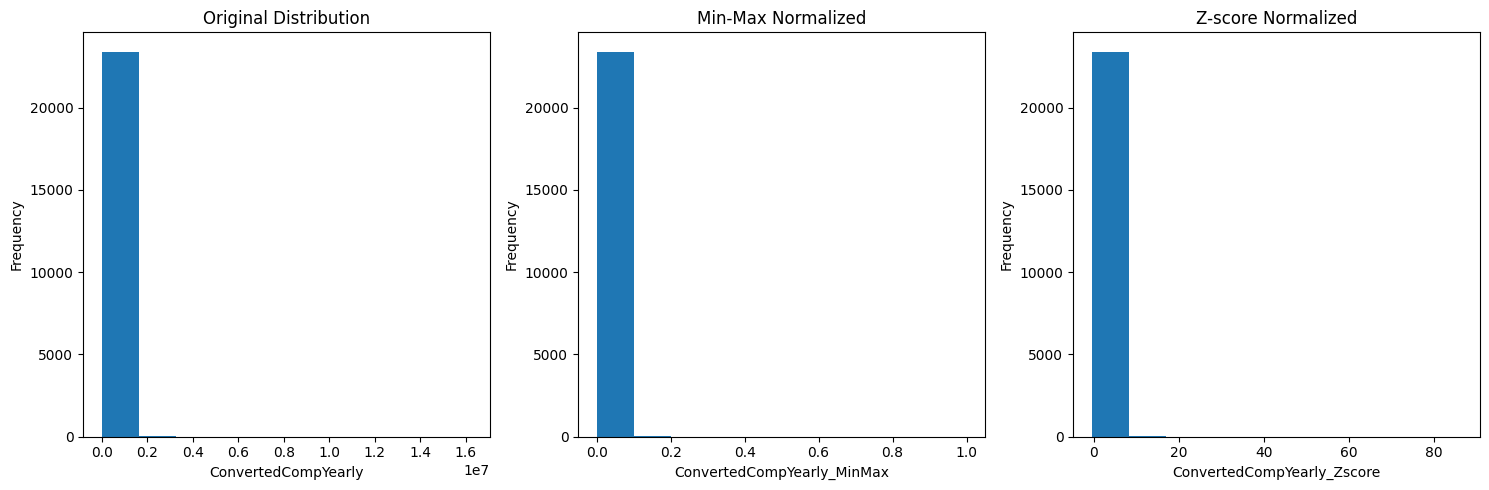

In [27]:
## Write your code here

# Task 7: Visualize distributions
plt.figure(figsize=(15, 5))

# Original distribution
plt.subplot(1, 3, 1)
plt.hist(df['ConvertedCompYearly'], bins=10)
plt.title('Original Distribution')
plt.xlabel('ConvertedCompYearly')
plt.ylabel('Frequency')

# Min-Max normalized distribution
plt.subplot(1, 3, 2)
plt.hist(df['ConvertedCompYearly_MinMax'], bins=10)
plt.title('Min-Max Normalized')
plt.xlabel('ConvertedCompYearly_MinMax')
plt.ylabel('Frequency')

# Z-score normalized distribution
plt.subplot(1, 3, 3)
plt.hist(df['ConvertedCompYearly_Zscore'], bins=10)
plt.title('Z-score Normalized')
plt.xlabel('ConvertedCompYearly_Zscore')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

### Summary


In this lab, you practiced essential normalization techniques, including:

- Identifying and handling duplicate rows.

- Checking for and imputing missing values.

- Applying Min-Max scaling and Z-score normalization to compensation data.

- Visualizing the impact of normalization on data distribution.


Copyright © IBM Corporation. All rights reserved.
